In [ ]:
#Loading the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train_df=pd.read_csv("/content/train.csv")

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Data Types and Numerical Features
print("Data Types:\n", train_df.dtypes)
numerical_features = train_df.select_dtypes(include=['number'])
print("\nDescriptive Statistics for Numerical Features:\n", numerical_features.describe())

# Missing Values
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nPercentage of Missing Values:\n", missing_percentage)

# DataFrame Shape
print("\nDataFrame Shape:", train_df.shape)

# Unique Values for Categorical Features
categorical_features = train_df.select_dtypes(include=['object'])
for col in categorical_features.columns:
    print(f"\nUnique values for {col}:\n{train_df[col].unique()[:20]}") # Limit to 20 for better readability
    print(f"Number of unique values for {col}: {train_df[col].nunique()}")

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Descriptive Statistics for Numerical Features:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch

In [ ]:
#Handling missing values
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

/tmp/ipython-input-35-1717537558.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
/tmp/ipython-input-35-1717537558.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [ ]:
# removing irrelevant colum
train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
# Convert categorical variables
df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

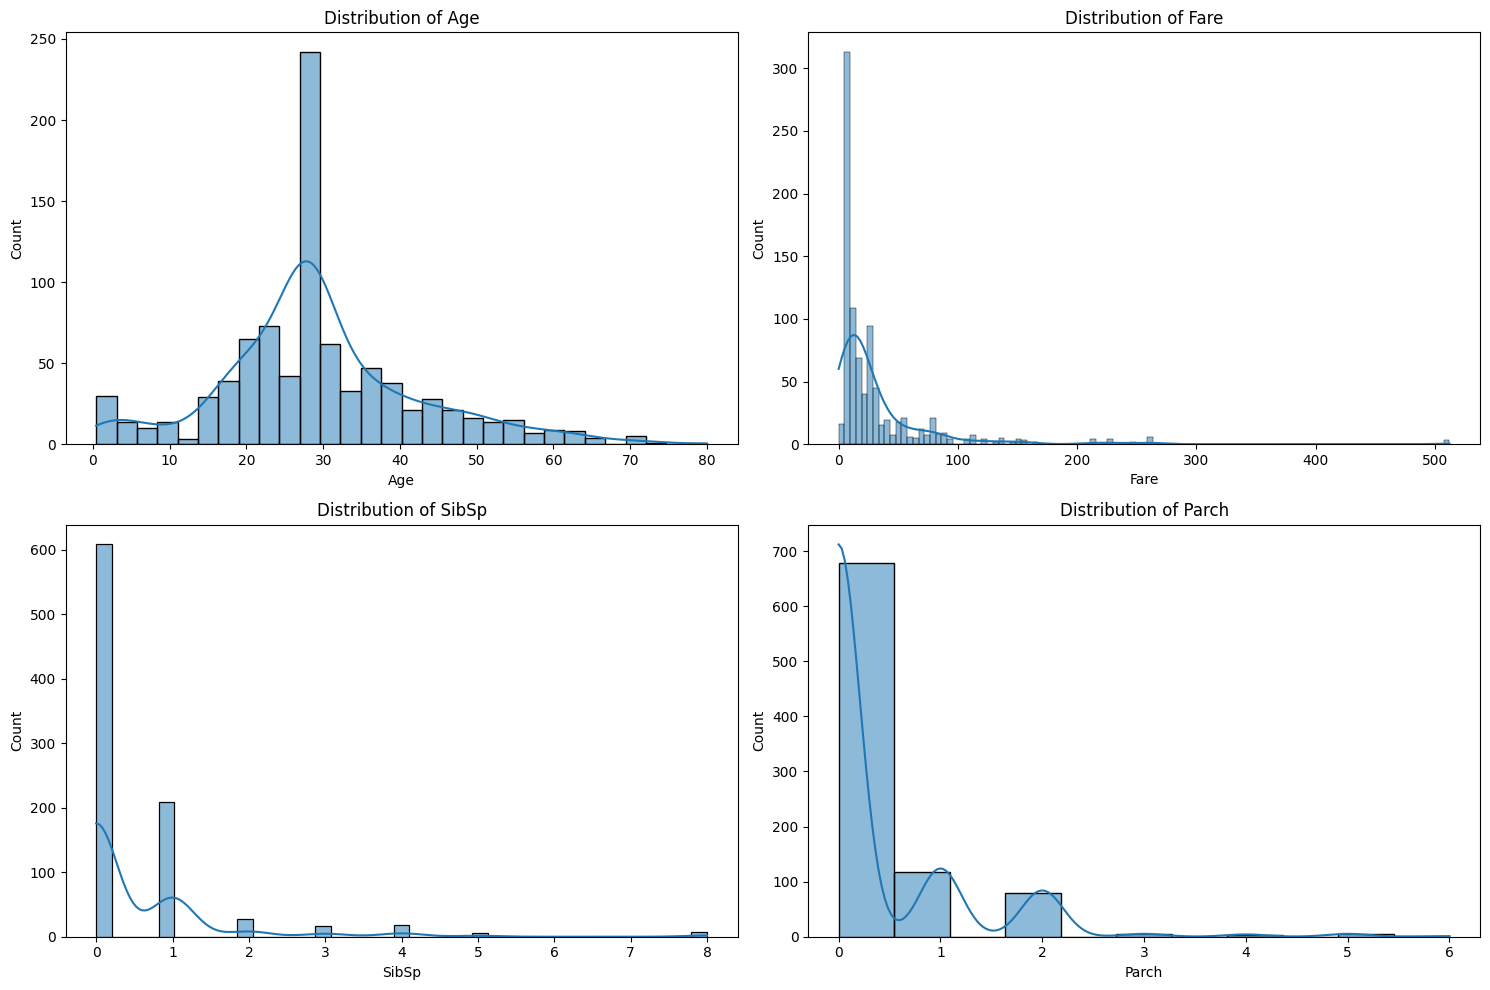

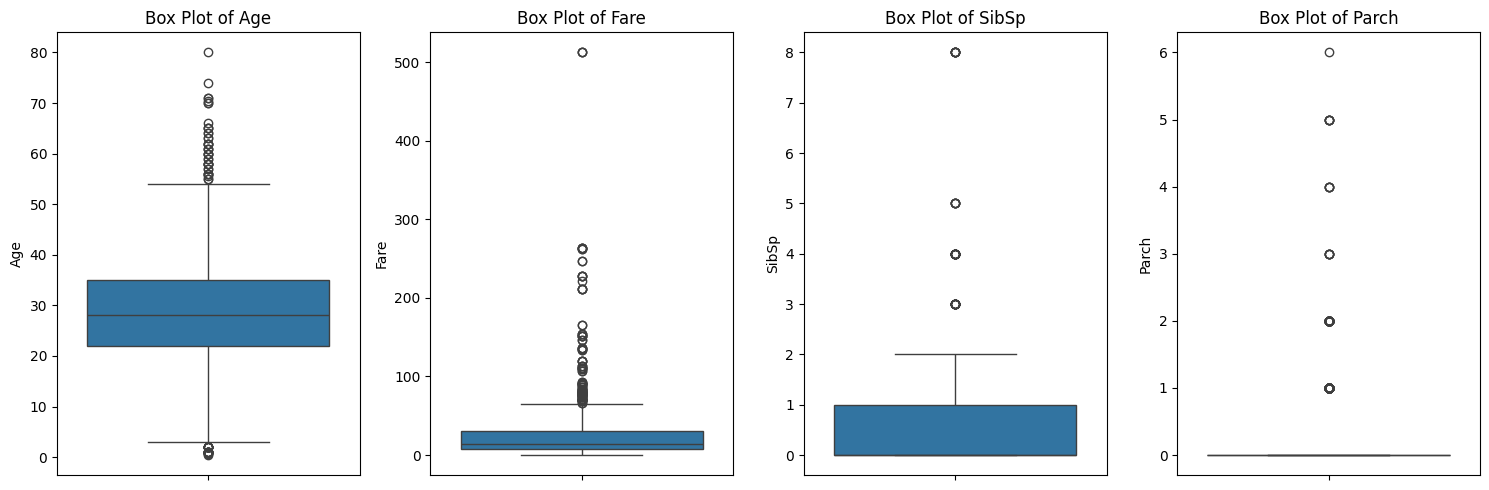

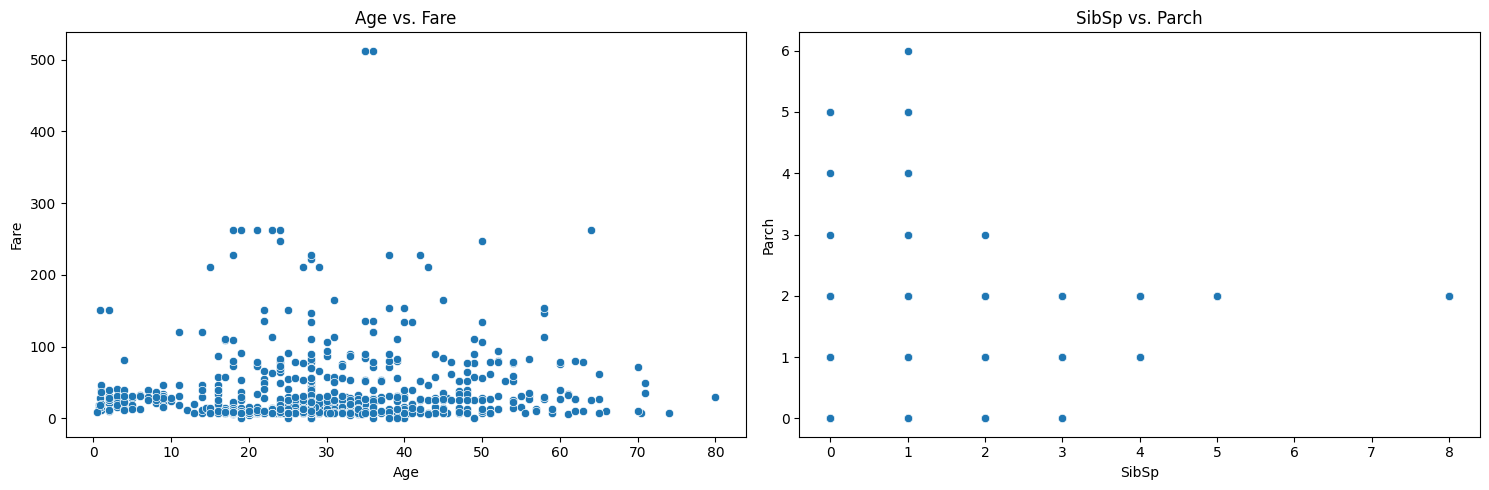

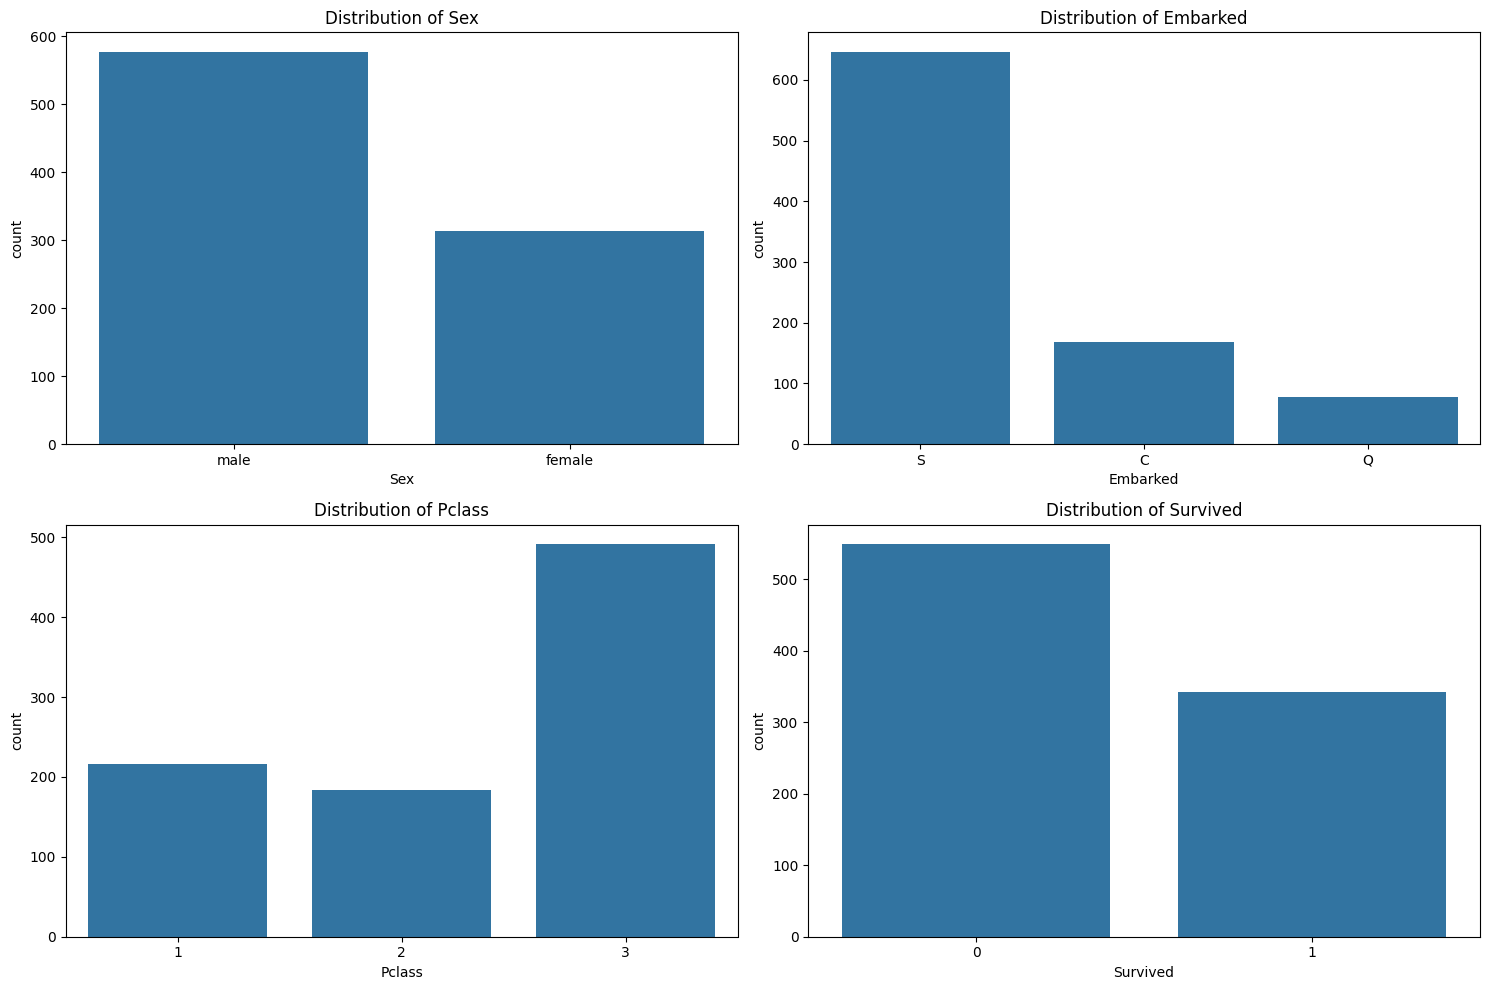

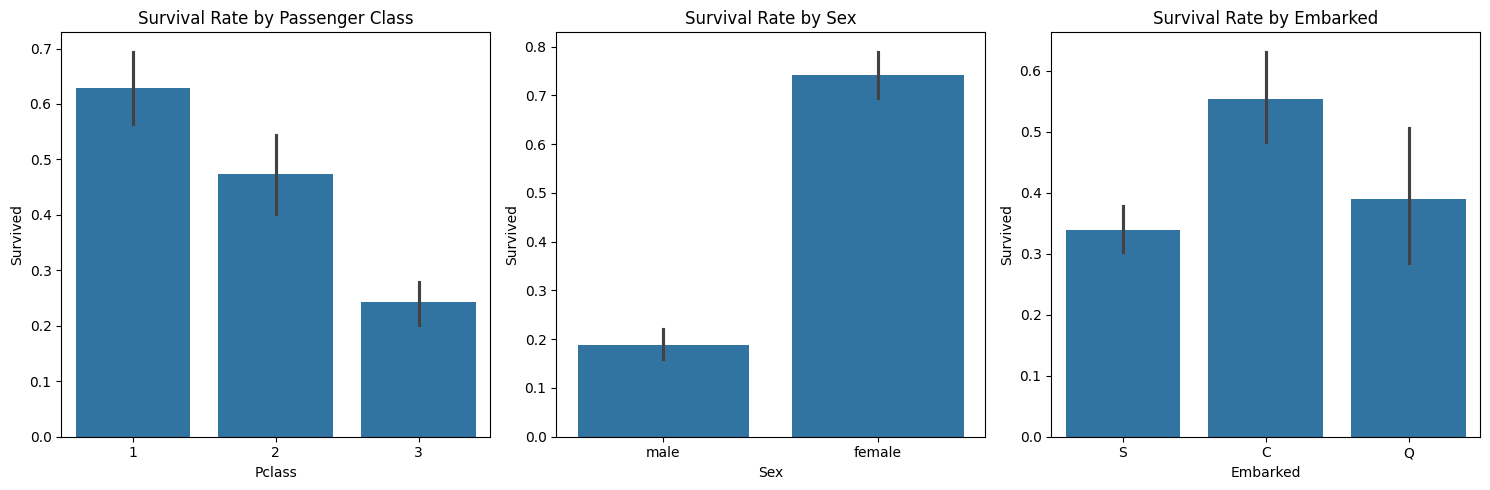

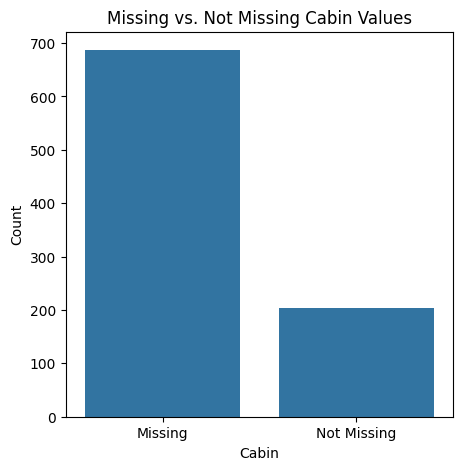

In [ ]:
# Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age', 'Fare', 'SibSp', 'Parch']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age', 'Fare', 'SibSp', 'Parch']):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=train_df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


# Scatter plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Fare', data=train_df)
plt.title('Age vs. Fare')

plt.subplot(1, 2, 2)
sns.scatterplot(x='SibSp', y='Parch', data=train_df)
plt.title('SibSp vs. Parch')

plt.tight_layout()
plt.show()

# Visualize the distribution of categorical features
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='Sex', data=train_df)
plt.title('Distribution of Sex')

plt.subplot(2, 2, 2)
sns.countplot(x='Embarked', data=train_df)
plt.title('Distribution of Embarked')

plt.subplot(2, 2, 3)
sns.countplot(x='Pclass', data=train_df)
plt.title('Distribution of Pclass')


plt.subplot(2,2,4)
sns.countplot(x='Survived', data=train_df)
plt.title('Distribution of Survived')

plt.tight_layout()
plt.show()

# Visualize the relationship between categorical features and 'Survived'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')

plt.subplot(1, 3, 2)
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')

plt.subplot(1, 3, 3)
sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.title('Survival Rate by Embarked')
plt.tight_layout()
plt.show()

# Cabin visualization
df_cabin_missing = pd.DataFrame({'Cabin': ['Missing', 'Not Missing'],
                                 'Count': [train_df['Cabin'].isnull().sum(), train_df['Cabin'].notnull().sum()]})
plt.figure(figsize=(5, 5))
sns.barplot(x='Cabin', y='Count', data=df_cabin_missing)
plt.title('Missing vs. Not Missing Cabin Values')
plt.show()

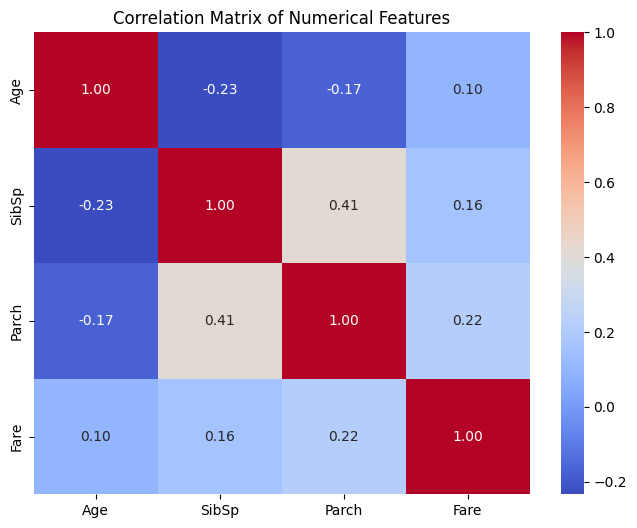

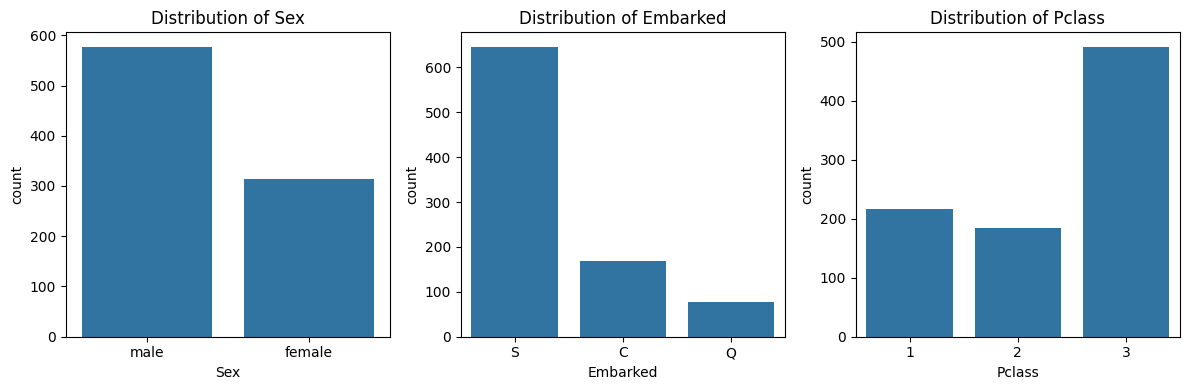

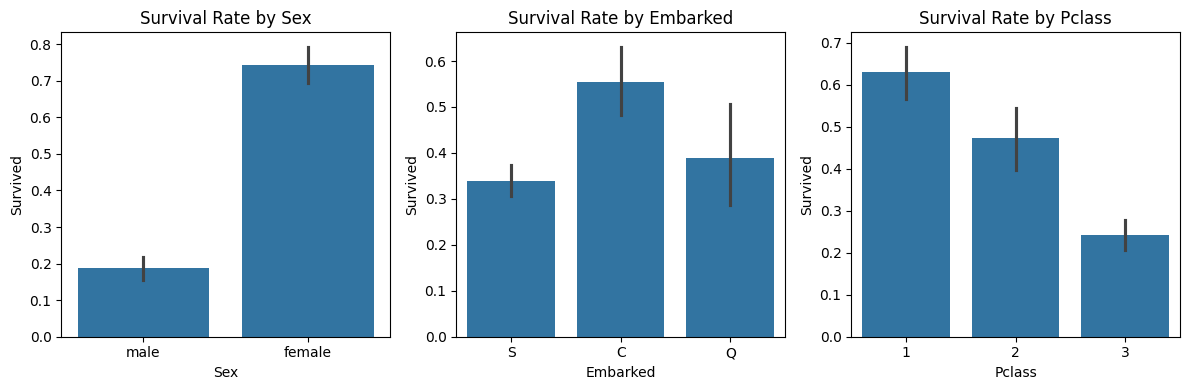

In [ ]:
# Correlation matrix for numerical features
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = train_df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Distribution of categorical features
categorical_cols = ['Sex', 'Embarked', 'Pclass']
plt.figure(figsize=(12, 4))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, data=train_df)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Relationship between categorical features and 'Survived'
plt.figure(figsize=(12, 4))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x=col, y='Survived', data=train_df)
    plt.title(f'Survival Rate by {col}')
plt.tight_layout()
plt.show()

## Summary:


### Data Analysis Key Findings
* **Missing Data:** The 'Cabin' column has the highest percentage of missing values (77.1%), followed by 'Age' (19.9%).  The 'Embarked' column has a small number of missing values (0.2%).
* **Potential Outliers:** The 'Fare' column shows a maximum value significantly higher than the 75th percentile, suggesting potential outliers.  Outliers were also suggested in 'Age' and 'SibSp'.
* **Feature Distributions:**  Visualizations revealed the distributions of numerical features like 'Age', 'Fare', 'SibSp', and 'Parch'.  Categorical features like 'Sex', 'Embarked', and 'Pclass' were also analyzed, showing imbalances in their distributions.
* **Survival Correlation:**  Survival rates varied significantly across different passenger classes ('Pclass'), sexes ('Sex'), and embarkation points ('Embarked').  The visualizations suggest correlations between these categorical features and survival.

### Insights or Next Steps
* **Missing Value Imputation:** Develop a strategy for handling missing values in 'Cabin' and 'Age' columns.  Consider imputation techniques or creating a new indicator variable for missingness.
* **Outlier Treatment:** Investigate and address the potential outliers in 'Fare', 'Age' and 'SibSp', potentially through transformation or removal.
### summary of Insights
-Females and passengers in 1st class had higher survival rates.
- Children had higher chances of survival than adults.
- Large families had lower survival rates compared to small ones.
- Higher fare passengers were more likely to survive.

